In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [41]:
file = pd.read_csv('Ten+Questions+-+Test+Data_November+4,+2019_09.03.csv')
file = file[file.columns[:-2]]
file = file.drop([0, 1]).reset_index().drop('index', axis=1)

df = pd.DataFrame()
# Q45 - Please rate how troubled you feel about your stressful situation. Scale 0 (not troubled)-10 (very troubled)
file['Q45'] = file['Q45'].replace('', np.nan)
# Q46 - Please re-rate how troubled you feel about your stressful situation. Scale 0 (not troubled)-10 (very troubled)
file['Q46'] = file['Q46'].replace('', np.nan)

df["prestress"] = file["Q45"].fillna(file["Q31"])
df["poststress"] = file["Q46"].fillna(file["Q32"])

# Q109 - How old are you? Values allowed 18 to 100
df["age"] = file['Q109']
# Q110 - How would you describe your gender identity? 1-Male, 2-Female, 4-Other
df["gender"] = file['Q110']

df["poststress"] = df["poststress"].astype(int)
df["prestress"] = df["prestress"].astype(int)
df["age"] = df["age"].astype(int)
df["gender"] = df["gender"].astype('category')

# Reward - Change in stress level
df['change'] = df['prestress'] - df['poststress']

df

,prestress,poststress,age,gender,change
0,-99,10,69,2,-109
1,3,10,37,-99,-7
2,3,10,63,-99,-7
3,5,4,44,1,1
4,5,3,90,4,2
...,...,...,...,...,...
404,2,2,61,4,0
405,10,7,79,-99,3
406,11,11,77,1,0
407,6,11,38,1,-5


In [42]:
df = df[df.prestress != -99]
df = df[df.poststress != -99]
df = df[df.age != -99]
df = df[df.gender != '-99']
df.reset_index(drop=True)
df

,prestress,poststress,age,gender,change
3,5,4,44,1,1
4,5,3,90,4,2
6,10,6,82,4,4
7,9,4,93,1,5
8,6,7,59,4,-1
...,...,...,...,...,...
402,2,6,68,4,-4
404,2,2,61,4,0
406,11,11,77,1,0
407,6,11,38,1,-5


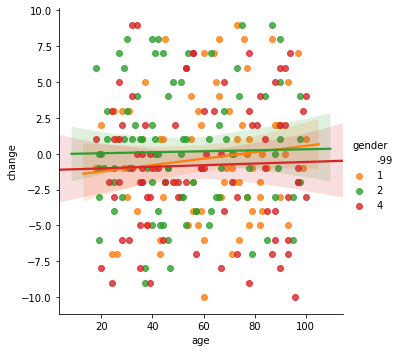

In [43]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.lmplot(y = 'change', x = 'age', hue='gender', data = df)

In [44]:
import statsmodels.formula.api as smf
model = smf.ols("change ~ age + C(gender)", data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 change   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8910
Date:                Mon, 04 Nov 2019   Prob (F-statistic):              0.446
Time:                        11:59:05   Log-Likelihood:                -742.28
No. Observations:                 256   AIC:                             1493.
Df Residuals:                     252   BIC:                             1507.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.6472      0.555     -1.